In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

import os
from PIL import Image
from IPython.display import display

from torch.utils import data

import cv2
from pathlib import Path
from torch.nn import functional as F

In [2]:
! ls

data  segmentation_notebook.ipynb


In [3]:
! ls data

cityscapes_data


In [4]:
! ls data/cityscapes_data

cityscapes_data  train	val


In [5]:
train_list = []
for filename in os.listdir('data/cityscapes_data/train'):
    if filename.endswith(".jpg"):
        train_list.append(os.path.join('data/cityscapes_data/train', filename))

In [6]:
train_list

['data/cityscapes_data/train/1873.jpg',
 'data/cityscapes_data/train/91.jpg',
 'data/cityscapes_data/train/676.jpg',
 'data/cityscapes_data/train/1754.jpg',
 'data/cityscapes_data/train/1191.jpg',
 'data/cityscapes_data/train/2972.jpg',
 'data/cityscapes_data/train/1231.jpg',
 'data/cityscapes_data/train/2373.jpg',
 'data/cityscapes_data/train/1722.jpg',
 'data/cityscapes_data/train/146.jpg',
 'data/cityscapes_data/train/345.jpg',
 'data/cityscapes_data/train/735.jpg',
 'data/cityscapes_data/train/80.jpg',
 'data/cityscapes_data/train/44.jpg',
 'data/cityscapes_data/train/2489.jpg',
 'data/cityscapes_data/train/1601.jpg',
 'data/cityscapes_data/train/118.jpg',
 'data/cityscapes_data/train/2669.jpg',
 'data/cityscapes_data/train/990.jpg',
 'data/cityscapes_data/train/2381.jpg',
 'data/cityscapes_data/train/1152.jpg',
 'data/cityscapes_data/train/941.jpg',
 'data/cityscapes_data/train/1667.jpg',
 'data/cityscapes_data/train/2902.jpg',
 'data/cityscapes_data/train/468.jpg',
 'data/citysca

In [7]:
val_list = []
for filename in os.listdir('data/cityscapes_data/val'):
    if filename.endswith(".jpg"):
        val_list.append(os.path.join('data/cityscapes_data/val', filename))

In [8]:
val_list

['data/cityscapes_data/val/91.jpg',
 'data/cityscapes_data/val/146.jpg',
 'data/cityscapes_data/val/345.jpg',
 'data/cityscapes_data/val/80.jpg',
 'data/cityscapes_data/val/44.jpg',
 'data/cityscapes_data/val/118.jpg',
 'data/cityscapes_data/val/468.jpg',
 'data/cityscapes_data/val/66.jpg',
 'data/cityscapes_data/val/465.jpg',
 'data/cityscapes_data/val/275.jpg',
 'data/cityscapes_data/val/106.jpg',
 'data/cityscapes_data/val/184.jpg',
 'data/cityscapes_data/val/456.jpg',
 'data/cityscapes_data/val/46.jpg',
 'data/cityscapes_data/val/389.jpg',
 'data/cityscapes_data/val/390.jpg',
 'data/cityscapes_data/val/355.jpg',
 'data/cityscapes_data/val/56.jpg',
 'data/cityscapes_data/val/348.jpg',
 'data/cityscapes_data/val/265.jpg',
 'data/cityscapes_data/val/178.jpg',
 'data/cityscapes_data/val/190.jpg',
 'data/cityscapes_data/val/403.jpg',
 'data/cityscapes_data/val/113.jpg',
 'data/cityscapes_data/val/366.jpg',
 'data/cityscapes_data/val/3.jpg',
 'data/cityscapes_data/val/496.jpg',
 'data/ci

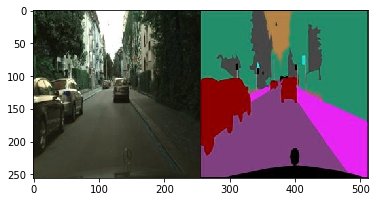

In [9]:
img_test = cv2.imread(train_list[23])
plt.imshow(img_test)

In [10]:
img_test.shape

(256, 512, 3)

In [49]:
def split_img(path):
    img_mask = cv2.imread(path)
    img = img_mask[:,:256]
    mask = img_mask[:,256:]
    return (img, mask)

In [12]:
img, mask = load_img(train_list[23])

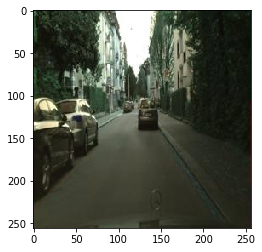

In [13]:
plt.imshow(img)

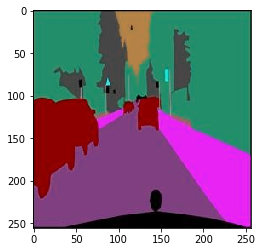

In [14]:
plt.imshow(mask)

In [68]:
class UNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, (1,1))
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 16, 3, 1, (1,1))
        self.bn2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, 3, 1, (1,1))
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 32, 3, 1, (1,1))
        self.bn4 = nn.BatchNorm2d(32)
        self.conv5 = nn.Conv2d(32, 64, 3, 1, (1,1))
        self.bn5 = nn.BatchNorm2d(64)
        self.conv6 = nn.Conv2d(64, 64, 3, 1, (1,1))
        self.bn6 = nn.BatchNorm2d(64)
        self.conv7 = nn.Conv2d(64, 128, 3, 1, (1,1))
        self.bn7 = nn.BatchNorm2d(128)
        self.conv8 = nn.Conv2d(128, 128, 3, 1, (1,1))
        self.bn8 = nn.BatchNorm2d(128)
        self.conv9 = nn.Conv2d(128, 256, 3, 1, (1,1))
        self.bn9 = nn.BatchNorm2d(256)
        self.conv10 = nn.Conv2d(256, 256, 3, 1, (1,1))
        self.bn10 = nn.BatchNorm2d(256)
        self.tconv1 = nn.ConvTranspose2d(256, 128, 2, 2)
        self.conv11 = nn.Conv2d(256, 128, 3, 1, (1,1))
        self.bn11 = nn.BatchNorm2d(128)
        self.conv12 = nn.Conv2d(128, 128, 3, 1, (1,1))
        self.bn12 = nn.BatchNorm2d(128)
        self.tconv2 = nn.ConvTranspose2d(128, 64, 2, 2)
        self.conv13 = nn.Conv2d(128, 64, 3, 1, (1,1))
        self.bn13 = nn.BatchNorm2d(64)
        self.conv14 = nn.Conv2d(64, 64, 3, 1, (1,1))
        self.bn14 = nn.BatchNorm2d(64)
        self.tconv3 = nn.ConvTranspose2d(64, 32, 2, 2)
        self.conv15 = nn.Conv2d(64, 32, 3, 1, (1,1))
        self.bn15 = nn.BatchNorm2d(32)
        self.conv16 = nn.Conv2d(32, 32, 3, 1, (1,1))
        self.bn16 = nn.BatchNorm2d(32)
        self.tconv4 = nn.ConvTranspose2d(32, 16, 2, 2)
        self.conv17 = nn.Conv2d(32, 16, 3, 1, (1,1))
        self.bn17 = nn.BatchNorm2d(16)
        self.conv18 = nn.Conv2d(16, 16, 3, 1, (1,1))
        self.bn18 = nn.BatchNorm2d(16)
        self.conv19 = nn.Conv2d(16, 3, 1, 1)
        self.bn19 = nn.BatchNorm2d(3)
    def forward(self, X):
        c1 = self.conv1(X)
        c1 = self.bn1(c1)
        c1 = F.relu(c1)
        c1 = self.conv2(c1)
        c1 = self.bn2(c1)
        c1 = F.relu(c1)
        p1 = F.max_pool2d(c1, 2, 2)
        c2 = self.conv3(p1)
        c2 = self.bn3(c2)
        c2 = F.relu(c2)
        c2 = self.conv4(c2)
        c2 = self.bn4(c2)
        c2 = F.relu(c2)
        p2 = F.max_pool2d(c2, 2, 2)
        c3 = self.conv5(p2)
        c3 = self.bn5(c3)
        c3 = F.relu(c3)
        c3 = self.conv6(c3)
        c3 = self.bn6(c3)
        c3 = F.relu(c3)
        p3 = F.max_pool2d(c3, 2, 2)
        c4 = self.conv7(p3)
        c4 = self.bn7(c4)
        c4 = F.relu(c4)
        c4 = self.conv8(c4)
        c4 = self.bn8(c4)
        c4 = F.relu(c4)
        p4 = F.max_pool2d(c4, 2, 2)
        c5 = self.conv9(p4)
        c5 = self.bn9(c5)
        c5 = F.relu(c5)
        c5 = self.conv10(c5)
        c5 = self.bn10(c5)
        c5 = F.relu(c5)
        u6 = self.tconv1(c5)
        u6 = torch.cat((u6,c4),1)
        c6 = self.conv11(u6)
        c6 = self.bn11(c6)
        c6 = F.relu(c6)
        c6 = self.conv12(c6)
        c6 = self.bn12(c6)
        c6 = F.relu(c6)
        u7 = self.tconv2(c6)
        u7 = torch.cat((u7,c3),1)
        c7 = self.conv13(u7)
        c7 = self.bn13(c7)
        c7 = F.relu(c7)
        c7 = self.conv14(c7)
        c7 = self.bn14(c7)
        c7 = F.relu(c7)
        u8 = self.tconv3(c7)
        u8 = torch.cat((u8,c2),1)
        c8 = self.conv15(u8)
        c8 = self.bn15(c8)
        c8 = F.relu(c8)
        c8 = self.conv16(c8)
        c8 = self.bn16(c8)
        c8 = F.relu(c8)
        u9 = self.tconv4(c8)
        u9 = torch.cat((u9,c1),1)
        c9 = self.conv17(u9)
        c9 = self.bn17(c9)
        c9 = F.relu(c9)
        c9 = self.conv18(c9)
        c9 = self.bn18(c9)
        c9 = F.relu(c9)
        c10 = self.conv19(c9)
        c10 = self.bn19(c10)
        return c10

In [69]:
test_model = UNet()

In [ ]:
img = img[np.newaxis, :,:,:]

In [ ]:
img.shape

In [ ]:
img = np.transpose(img, (0, 3, 1, 2))

In [ ]:
img.shape

In [ ]:
img

In [ ]:
img_pred = test_model(torch.from_numpy(img).float())

In [ ]:
img_pred.shape

In [ ]:
def create_cityscapes_label_colormap():
    colormap = np.zeros((19, 3), dtype=np.uint8)
    colormap[0] = [128, 64, 128]
    colormap[1] = [244, 35, 232]
    colormap[2] = [70, 70, 70]
    colormap[3] = [102, 102, 156]
    colormap[4] = [190, 153, 153]
    colormap[5] = [153, 153, 153]
    colormap[6] = [250, 170, 30]
    colormap[7] = [220, 220, 0]
    colormap[8] = [107, 142, 35]
    colormap[9] = [152, 251, 152]
    colormap[10] = [70, 130, 180]
    colormap[11] = [220, 20, 60]
    colormap[12] = [255, 0, 0]
    colormap[13] = [0, 0, 142]
    colormap[14] = [0, 0, 70]
    colormap[15] = [0, 60, 100]
    colormap[16] = [0, 80, 100]
    colormap[17] = [0, 0, 230]
    colormap[18] = [119, 11, 32]
    return colormap

In [ ]:
colormap = create_cityscapes_label_colormap()

In [ ]:
mask[3][12]

In [ ]:
mask = torch.from_numpy(mask)

In [ ]:
mask.shape

In [ ]:
mask = torch.nn.functional.one_hot(mask)

In [ ]:
plt.imshow(mask)

In [ ]:
mask.shape

In [20]:
mask[255][128]

array([0, 0, 0], dtype=uint8)

In [37]:
classes_list = []
for path in train_list:
    img, mask = load_img(path)
    for i in range(256):
        for j in range(256):
            classes_list.append(mask[i][j])

In [38]:
classes_set = [1,2,3,4,4,4,4,4,4]

In [27]:
3 in set(classes_set)

True

In [33]:
a = 1

In [34]:
b = np.array([1,2,3])

In [35]:
(a==b)

array([ True, False, False])

In [41]:
l = [1,2,3]

In [42]:
l

[1, 2, 3]

In [43]:
a = [1,2,3]

In [44]:
l==a

True

In [45]:
mask = mask.tolist()

In [47]:
classes_list = []
for path in train_list:
    img, mask = load_img(path)
    mask = mask.tolist()
    for i in range(256):
        for j in range(256):
            if mask[i][j] not in classes_list:
                classes_list.append(mask[i][j])
    print(len(classes_list))

11530
22637
33605
40421


KeyboardInterrupt: 

In [48]:
classes_list

[[3, 13, 7],
 [2, 2, 0],
 [33, 9, 0],
 [46, 14, 0],
 [42, 14, 0],
 [45, 17, 0],
 [60, 20, 0],
 [52, 12, 0],
 [35, 6, 0],
 [18, 6, 0],
 [0, 7, 0],
 [0, 6, 1],
 [0, 6, 0],
 [0, 8, 0],
 [0, 12, 0],
 [0, 14, 0],
 [0, 13, 0],
 [0, 11, 0],
 [0, 10, 0],
 [0, 9, 0],
 [0, 3, 0],
 [1, 2, 0],
 [0, 1, 0],
 [2, 3, 0],
 [0, 4, 0],
 [0, 5, 0],
 [1, 5, 0],
 [2, 6, 0],
 [1, 3, 0],
 [0, 2, 0],
 [3, 3, 0],
 [4, 4, 0],
 [5, 5, 0],
 [5, 3, 2],
 [4, 2, 2],
 [3, 1, 1],
 [3, 0, 4],
 [1, 0, 4],
 [1, 0, 5],
 [0, 0, 5],
 [0, 1, 6],
 [0, 2, 7],
 [0, 2, 6],
 [0, 1, 5],
 [1, 0, 2],
 [5, 0, 1],
 [4, 0, 5],
 [2, 1, 5],
 [0, 0, 6],
 [3, 0, 9],
 [5, 0, 9],
 [5, 0, 10],
 [3, 0, 10],
 [2, 0, 9],
 [0, 0, 9],
 [0, 2, 3],
 [3, 3, 3],
 [0, 1, 2],
 [0, 0, 3],
 [4, 6, 7],
 [0, 0, 0],
 [3, 4, 2],
 [2, 0, 1],
 [2, 0, 0],
 [3, 1, 0],
 [3, 4, 0],
 [2, 3, 1],
 [0, 0, 1],
 [5, 5, 5],
 [1, 1, 1],
 [4, 4, 4],
 [2, 2, 2],
 [7, 7, 7],
 [6, 14, 7],
 [12, 10, 2],
 [89, 62, 48],
 [124, 87, 67],
 [124, 93, 62],
 [123, 91, 56],
 [138, 100, 6

In [50]:
img, mask = split_img(train_list[5])

In [51]:
img.shape

(256, 256, 3)

In [52]:
def load_img(path):
    img, mask = split_img(path)
    img = np.transpose(img, (2, 0, 1))
    img = torch.from_numpy(img).float()
    mask = np.transpose(mask, (2, 0, 1))
    mask = torch.from_numpy(mask).float()
    return img, mask

In [57]:
class CityscapesDataset(data.Dataset):
    
    def __init__(self, path_list):
        self.path_list = path_list
        
    def __len__(self):
        return len(self.path_list)
    
    def __getitem__(self, index):
        img, mask = load_img(self.path_list[index])
        return (img, mask)

In [58]:
dataset = CityscapesDataset(train_list)
train_loader = DataLoader(dataset, batch_size = 30, shuffle = True)

In [72]:
for image, mask in train_loader:
    break

In [65]:
img, mask = load_img(train_list[34])

In [64]:
img.shape

torch.Size([3, 256, 256])

In [74]:
pred = test_model(image)

In [75]:
pred.shape

torch.Size([30, 3, 256, 256])